# Understanding RoPE

In [1]:
import torch
import matplotlib.pyplot as plt
import math

In [2]:
SENTENCE = "Her big beautiful eyes sparkle with joy, I'm utterly smitten by her."

sentence_tokens = SENTENCE.split()
num_tokens = len(sentence_tokens)
emb_dim = 8


### Generating random embedding for sentence

In [3]:
torch.manual_seed(42)
senence_embedding = torch.rand((num_tokens,emb_dim))
# pookie printing
print(f"| token{"":<5} | Embedding Tensor")
print(f"-"*len('f"| token{"":<5} | Embedding Tensor"'))
for idx,token in enumerate(sentence_tokens):
    token_embedding = senence_embedding[idx]
    emb_string = " ".join(f"{v:.4f}" for v in token_embedding)
    print(f"| {token:<10} | {emb_string}")
print(f"-"*len('f"| token{"":<5} | Embedding Tensor"'))

| token      | Embedding Tensor
------------------------------------
| Her        | 0.8823 0.9150 0.3829 0.9593 0.3904 0.6009 0.2566 0.7936
| big        | 0.9408 0.1332 0.9346 0.5936 0.8694 0.5677 0.7411 0.4294
| beautiful  | 0.8854 0.5739 0.2666 0.6274 0.2696 0.4414 0.2969 0.8317
| eyes       | 0.1053 0.2695 0.3588 0.1994 0.5472 0.0062 0.9516 0.0753
| sparkle    | 0.8860 0.5832 0.3376 0.8090 0.5779 0.9040 0.5547 0.3423
| with       | 0.6343 0.3644 0.7104 0.9464 0.7890 0.2814 0.7886 0.5895
| joy,       | 0.7539 0.1952 0.0050 0.3068 0.1165 0.9103 0.6440 0.7071
| I'm        | 0.6581 0.4913 0.8913 0.1447 0.5315 0.1587 0.6542 0.3278
| utterly    | 0.6532 0.3958 0.9147 0.2036 0.2018 0.2018 0.9497 0.6666
| smitten    | 0.9811 0.0874 0.0041 0.1088 0.1637 0.7025 0.6790 0.9155
| by         | 0.2418 0.1591 0.7653 0.2979 0.8035 0.3813 0.7860 0.1115
| her.       | 0.2477 0.6524 0.6057 0.3725 0.7980 0.8399 0.1374 0.2331
------------------------------------


### Pairing them (embedding dim nees to be even)

In [4]:

print(f"| token{"":<5} | Embedding Tensor with pair")
print(f"-"*len('f"| token{"":<5} | Embedding Tensor with pair"'))
for idx,token in enumerate(sentence_tokens):
    token_embedding = senence_embedding[idx]
    emb_string = ''
    for i in range(0,len(token_embedding)//2):
        emb_string+=f"({token_embedding[2*i]:.4f}, {token_embedding[2*i+1]:.4f}), "
    print(f"| {token:<10} | {emb_string}")
print(f"-"*len('f"| token{"":<5} | Embedding Tensor with pair"'))

| token      | Embedding Tensor with pair
----------------------------------------------
| Her        | (0.8823, 0.9150), (0.3829, 0.9593), (0.3904, 0.6009), (0.2566, 0.7936), 
| big        | (0.9408, 0.1332), (0.9346, 0.5936), (0.8694, 0.5677), (0.7411, 0.4294), 
| beautiful  | (0.8854, 0.5739), (0.2666, 0.6274), (0.2696, 0.4414), (0.2969, 0.8317), 
| eyes       | (0.1053, 0.2695), (0.3588, 0.1994), (0.5472, 0.0062), (0.9516, 0.0753), 
| sparkle    | (0.8860, 0.5832), (0.3376, 0.8090), (0.5779, 0.9040), (0.5547, 0.3423), 
| with       | (0.6343, 0.3644), (0.7104, 0.9464), (0.7890, 0.2814), (0.7886, 0.5895), 
| joy,       | (0.7539, 0.1952), (0.0050, 0.3068), (0.1165, 0.9103), (0.6440, 0.7071), 
| I'm        | (0.6581, 0.4913), (0.8913, 0.1447), (0.5315, 0.1587), (0.6542, 0.3278), 
| utterly    | (0.6532, 0.3958), (0.9147, 0.2036), (0.2018, 0.2018), (0.9497, 0.6666), 
| smitten    | (0.9811, 0.0874), (0.0041, 0.1088), (0.1637, 0.7025), (0.6790, 0.9155), 
| by         | (0.2418, 0.1591)

### Generating Angles for each pair 

$$\theta_i = \frac{1}{10000^{\frac{2i}{d}}}$$

As we have emb_dim =8 so we need 4  anlges


In [5]:
angles = []

for i in range(emb_dim//2):
    theta_i = 1 / ((10_000)**((2*i)/emb_dim))
    angles.append(theta_i)

print(f"Angles : {angles}")

Angles : [1.0, 0.1, 0.01, 0.001]


### what we have 
- "m" position of each token 
- "theta" angle of rotation related to each pair in embedding

In [6]:
column_labels = [f'Embedding Pairs {i}' for i in range(emb_dim//2)]
row_labels = sentence_tokens 
table_data = []
for idx,token in enumerate(sentence_tokens):
    token_embedding = senence_embedding[idx]
    table_row=[]
    for i in range(0,len(token_embedding)//2):
        data = f"({token_embedding[2*i]:.4f}, {token_embedding[2*i+1]:.4f}), "
        table_entry_data = data+"\n theta="+str(angles[i]) + "\nm="+str(idx)
        table_row.append(table_entry_data)
    table_data.append(table_row)


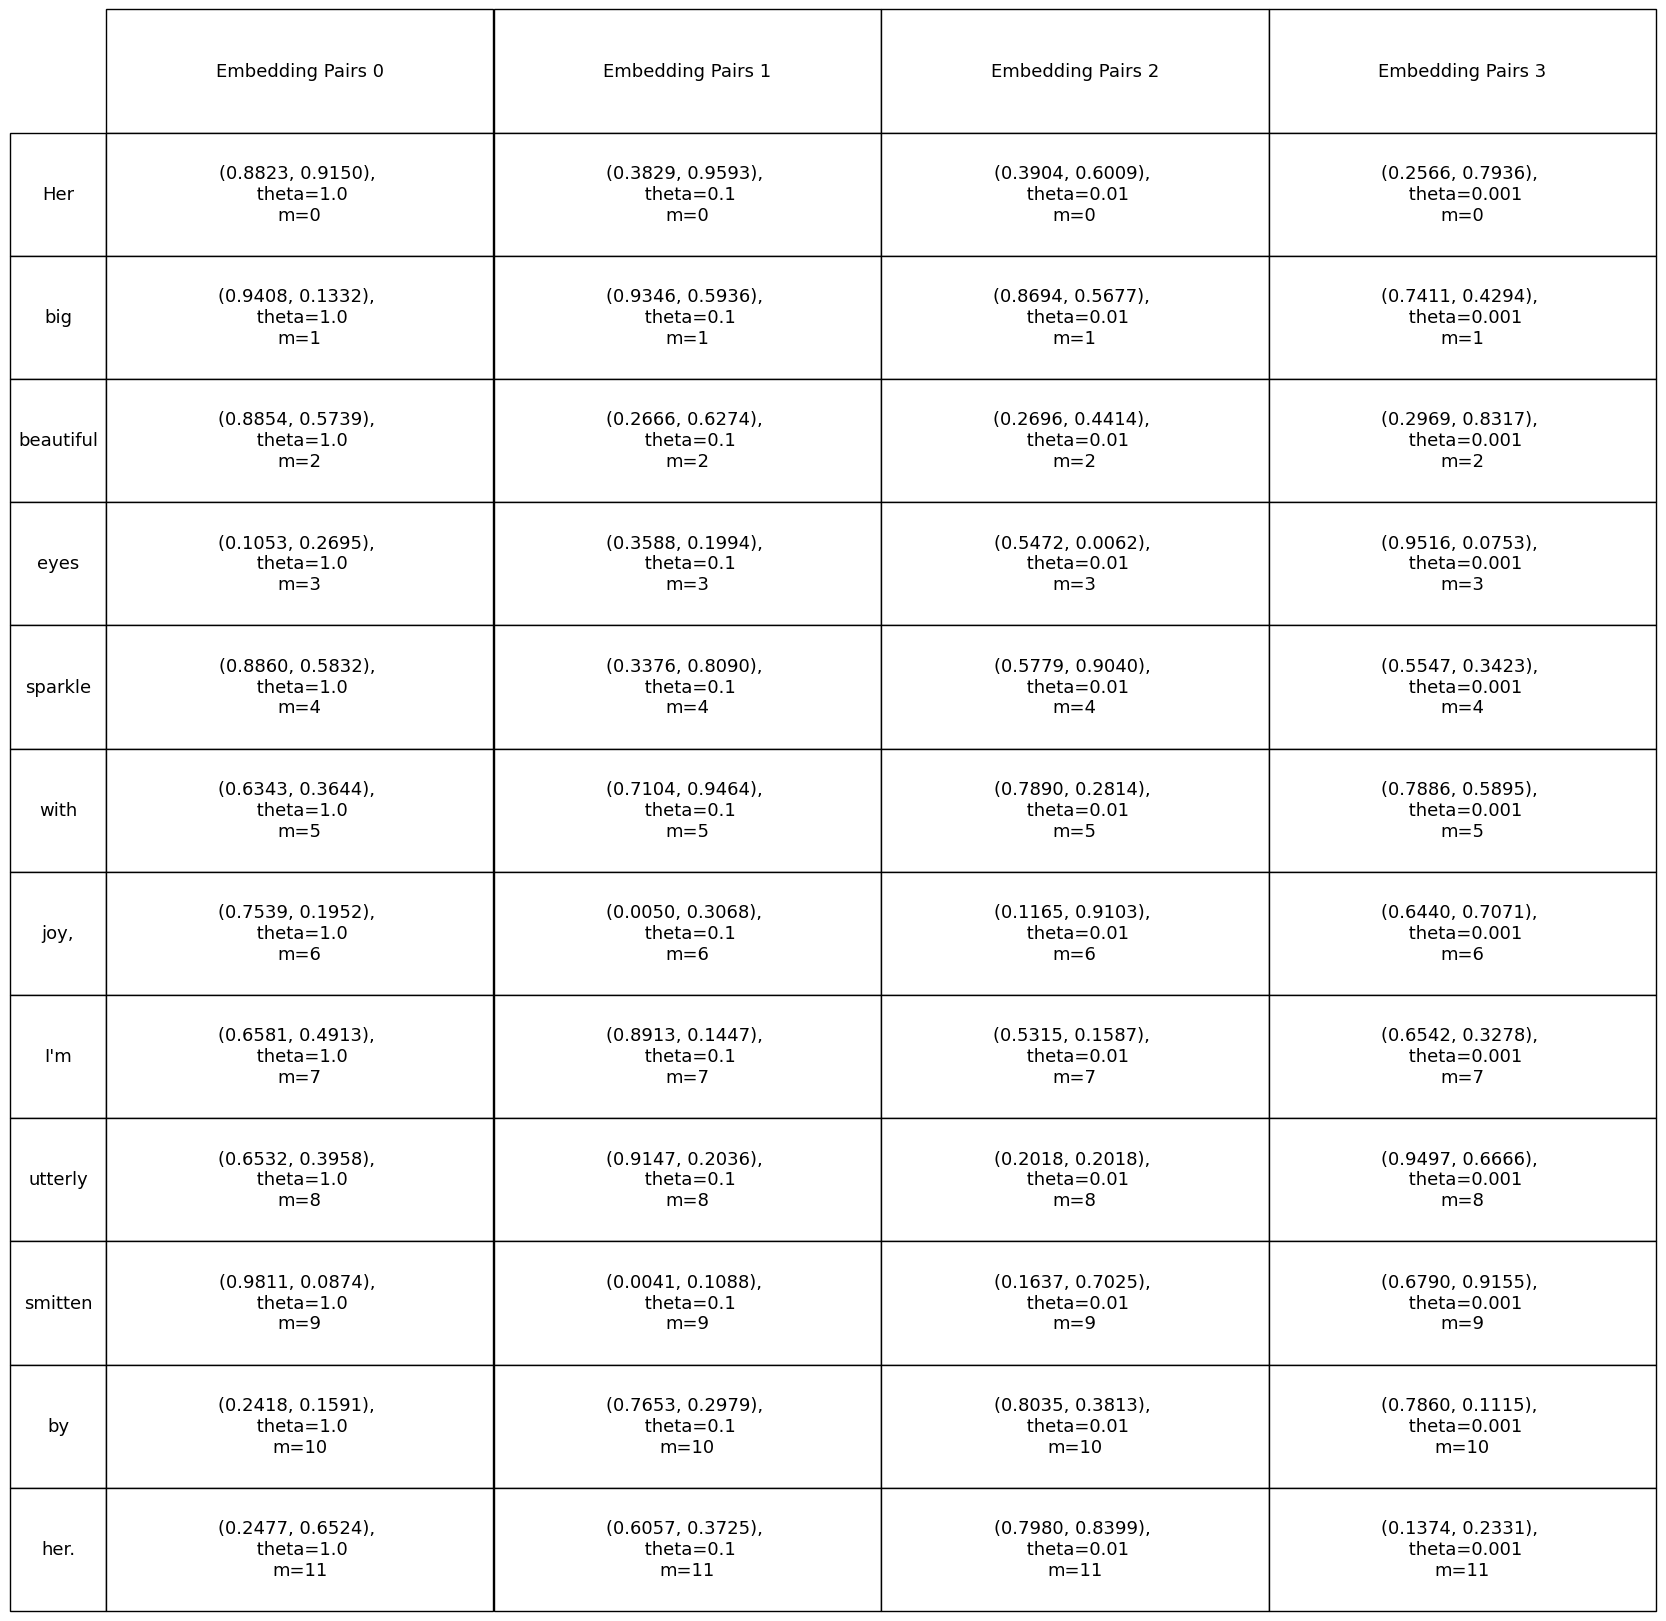

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.axis('off') 
table = ax.table(cellText=table_data,rowLabels=row_labels,colLabels=column_labels,loc='center')
for key, cell in table.get_celld().items():
    cell.set_text_props(ha='center', va='center')
    cell.set_fontsize(12)
    cell.set_height(0.1)
table.scale(1, 2)
table.auto_set_font_size(False)
table.set_fontsize(13)

plt.show()

### to give positional informaiton to Q and K we needs to rotate each pair by angle phi=m*theta 



$$
\phi_i = m \cdot \theta_i
$$

$$
\begin{aligned}
e'_{2i} &= e_{2i} \cos(\phi_i) - e_{2i+1} \sin(\phi_i) \\
e'_{2i+1} &= e_{2i} \sin(\phi_i) + e_{2i+1} \cos(\phi_i)
\end{aligned}
$$




### Rotating Embedding

In [9]:
def rotate(e1,e2,phi):
    rotated_e1 = e1*math.cos(phi)-e2*math.sin(phi)
    rotated_e2 = e1*math.sin(phi)+e2*math.cos(phi)
    return rotated_e1,rotated_e2

def rotate_embedding(token_embedding,angles,position):
    rotated_token_embedding=[]
    for i in range(emb_dim//2):
        e_2i = token_embedding[2*i].item()
        e_2i_1 = token_embedding[2*i+1].item()
        rotated_e_2i , rotated_e_2i_1 = rotate(e_2i,e_2i_1,angles[i]*position)
        rotated_token_embedding.append(rotated_e_2i)
        rotated_token_embedding.append(rotated_e_2i_1)
    return rotated_token_embedding 


rotated_embedding=[]
for i in range(num_tokens):
    token_embedding = senence_embedding[i]
    rotated_token_embedding = rotate_embedding(token_embedding,angles,i)
    rotated_embedding.append(rotated_token_embedding)




### Comparing rotated embedding vs Original embedding

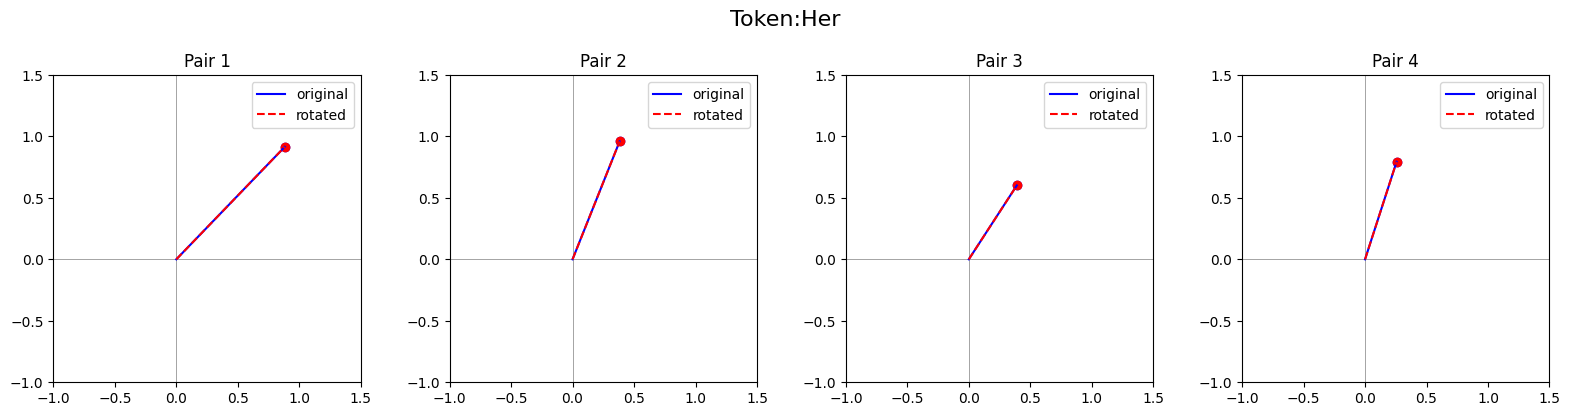

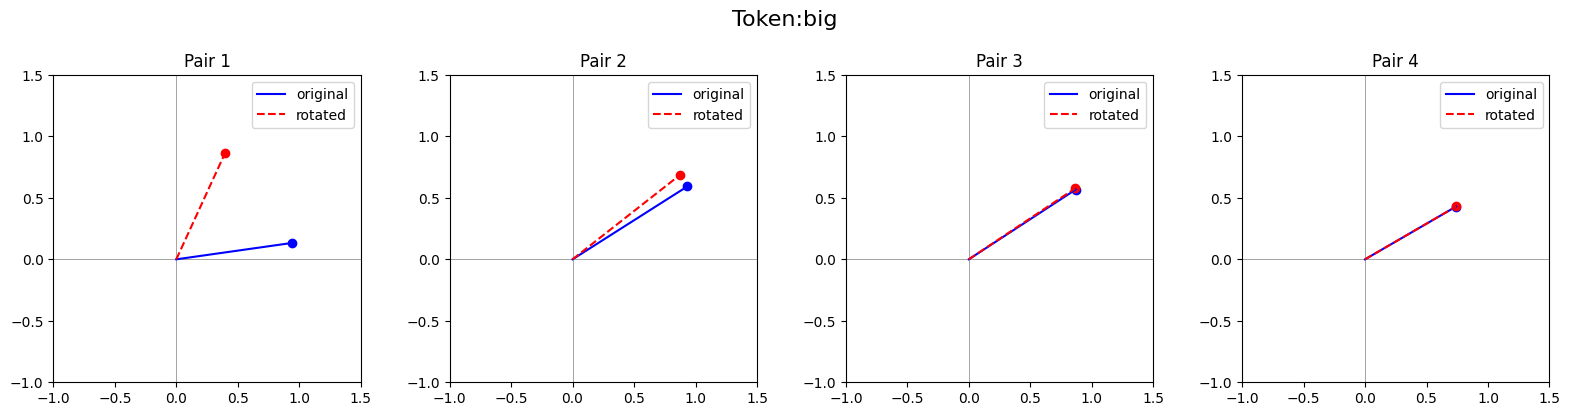

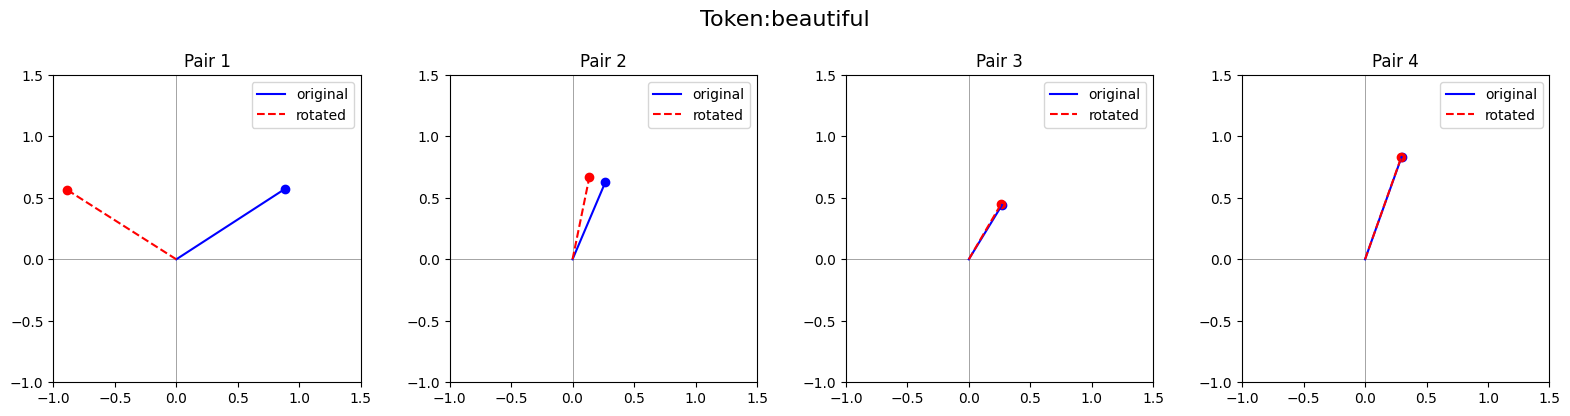

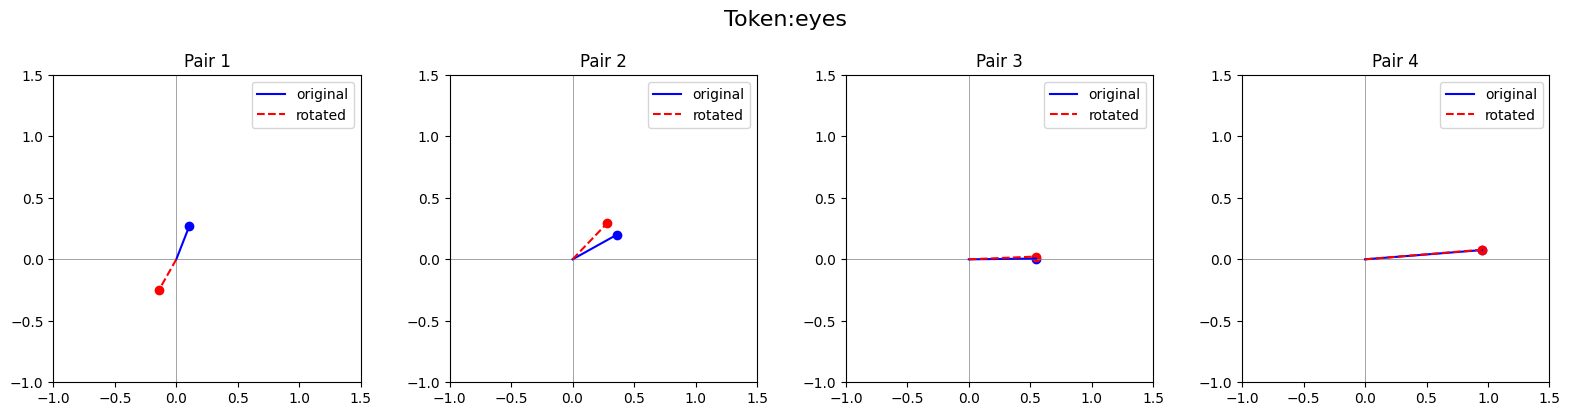

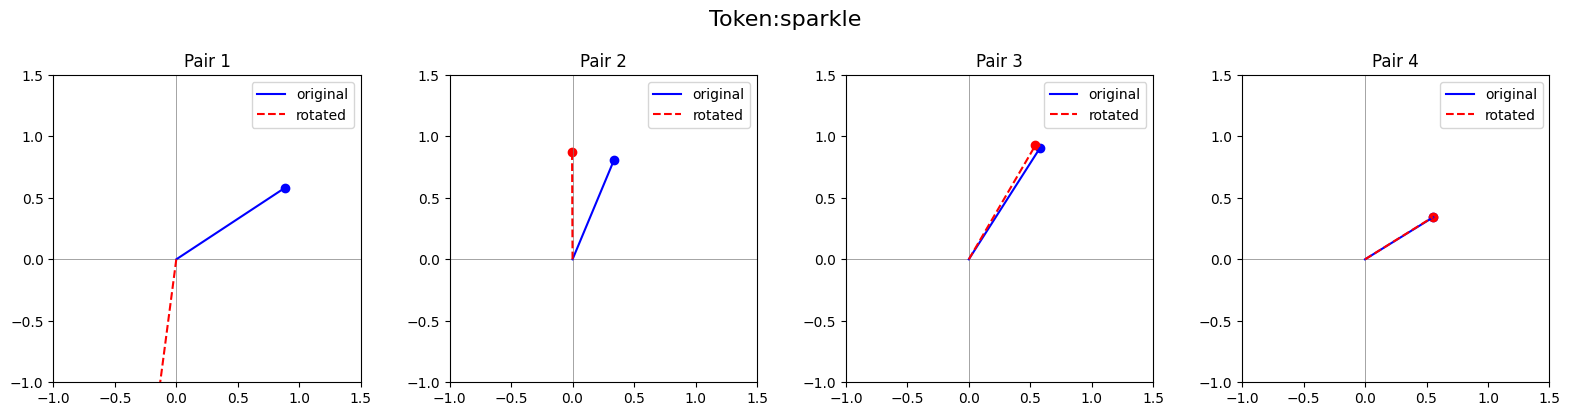

In [10]:
def plot_for_token(original_embedding,rotated_embedding,angles,token_name=None):
    fig , axs = plt.subplots(1,int(emb_dim//2),figsize=(16,4))
    fig.suptitle(f"Token:{"" if token_name is None else token_name}",fontsize=16)
    for i in range(emb_dim//2):
        e1 = original_embedding[2*i]
        e2 = original_embedding[2*i+1]

        e_1 = rotated_embedding[2*i]
        e_2 = rotated_embedding[2*i+1]

        theta = angles[i]

        ax = axs[i]
        ax.set_title(f"Pair {i+1}")
        ax.axhline(0, color='gray', lw=0.5)
        ax.axvline(0, color='gray', lw=0.5)
        ax.set_xlim(-1, 1.5)
        ax.set_ylim(-1, 1.5)
        ax.set_aspect('equal')
        ax.plot([0, e1], [0, e2], 'b-', label='original')
        ax.scatter(e1, e2, color='blue')
        ax.plot([0, e_1], [0, e_2], 'r--', label='rotated')
        ax.scatter(e_1, e_2, color='red')
        ax.legend()
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

break_point=4
for i in range(num_tokens):
    plot_for_token(
        senence_embedding[i],
        rotated_embedding[i],
        angles,
        sentence_tokens[i]
    )
    if i>=break_point:break



## earlier pairs has heigher rotaion due to large theta , meanwhile later pair show less rotation

<i><center><h1 style="color:red">Important Points or Question that arise in my mind</h1></center></i>


-  RoPE encodes positional information in rotation frequencies

**what if some (e1',e2') becomes equal to some (e1',e2') after rotaiton**
- **Within Same token**
    - theras are well apart [1.0, 0.1, 0.01 ... ] --> very unlikely untill vector is carefully crafter or values are (0,0)
    - thetas are calculated considering the pair length which is half of embedding dim, so domain of theta is set to embedding dim(May be)
- **Across Tokens**
    - tokens differ by position 'm', even for some thet two rotated output to match require conditions to be jsut right, which is very unlikely


**Let suppose they are equal**

- Meaning of token is deistribured accross the embedding not just pair usually embedding dim is 256-1024 


<i><center><h1 style="color:red">Note</h1></center></i>

- emb_Dim is 8 for eg if you take emb_dim =2 for example or just for visualization here thera = 1.0 and rotation of tokens are with m*theta then after a long sequence vectors overlap and raise ambiguity in vectors in RoPE

- Increasing the embedding dimension allows for multiple pairs of dimensions, each with a distinct frequency 

- High-frequency rotations (earlier dimensions) capture local positional information.

- Low-frequency rotations (later dimensions) capture global positional information.